In [1]:
# pip install pyproj

# Create Data 
* Correcting involved_markers_hebrew
* Create data for TA
* Convert and Create latitude and longitude to EPSG 32636
* Map to make sure accident in the align to BP
* Correcting BP data

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

import pyproj

## Loading **involved_markers_hebrew** and Fixing:
* Date
* Dropping columns

In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


In [3]:
i_m_h = pd.read_csv('./csv_tables/original_csv_tables/involved_markers_hebrew.csv')

C:\Users\itay8\AppData\Local\Temp\ipykernel_31132\1916716407.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h = pd.read_csv('./csv_tables/original_csv_tables/involved_markers_hebrew.csv')


Fixing Date

In [4]:
i_m_h['accident_date'] = pd.to_datetime(
    i_m_h['accident_year'].astype(str) + '-' + 
    i_m_h['accident_month'].astype(str) + '-' + 
    i_m_h['accident_day'].astype(str) + ' ' + 
    i_m_h['accident_hour'].astype(str) + ':' + 
    i_m_h['accident_minute'].astype(str)
)

Dropping duplicated columns

In [5]:
i_m_h.drop(columns=['vehicle_vehicle_type','vehicle_vehicle_type_hebrew'], inplace=True)

In [6]:
i_m_h.to_csv('./csv_tables/involved_markers_hebrew_corrected.csv', index=False)

## Create TA Data



In [7]:
i_m_h = pd.read_csv('./csv_tables/involved_markers_hebrew_corrected.csv')

C:\Users\itay8\AppData\Local\Temp\ipykernel_31132\3865934326.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h = pd.read_csv('./csv_tables/involved_markers_hebrew_corrected.csv')


In [8]:
i_m_h[i_m_h.accident_yishuv_symbol == 5000].copy().to_csv('./csv_tables/i_m_h_ta.csv', index=False)

## Converting Latitude and Longitude to EPSG 32636

In [9]:
i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')
i_m_h_ta

C:\Users\itay8\AppData\Local\Temp\ipykernel_31132\1775048707.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')


accident_id  provider_and_id  provider_code  file_type_police  \
0        2013000873      12013000873              1                 1   
1        2013002190      12013002190              1                 1   
2        2013000009      12013000009              1                 1   
3        2013000194      12013000194              1                 1   
4        2013001938      12013001938              1                 1   
...             ...              ...            ...               ...   
111403   2024095132      32024095132              3                 3   
111404   2024095132      32024095132              3                 3   
111405   2024097713      12024097713              1                 1   
111406   2024099291      32024099291              3                 3   
111407   2024096597      32024096597              3                 3   

        involved_type involved_type_hebrew  license_acquiring_date  age_group  \
0                   2             נהג נפגע                    1980         11   
1                   1                  נהג                       0         99   
2                   3                 נפגע                       0          5   
3                   2             נהג נפגע                    2000          7   
4                   1                  נהג                    1996          8   
...               ...                  ...                     ...        ...   
111403              1                  נהג                    1983         12   
111404              1                  נהג                    2017          6   
111405              1                  נהג                    1998         13   
111406              1                  נהג                       0         99   
111407              2             נהג נפגע                    1993         11   

       age_group_hebrew  sex  ... vehicle_status_hebrew  vehicle_attribution  \
0                 50-54    1  ...                   NaN                  1.0   
1               לא ידוע    0  ...                   NaN                  1.0   
2                 20-24    1  ...                   NaN                  NaN   
3                 30-34    2  ...                   NaN                  1.0   
4                 35-39    1  ...                   NaN                  1.0   
...                 ...  ...  ...                   ...                  ...   
111403            55-59    1  ...                   NaN                  1.0   
111404            25-29    2  ...                   NaN                  1.0   
111405            60-64    1  ...                   NaN                  1.0   
111406          לא ידוע    0  ...                   NaN                  1.0   
111407            50-54    2  ...                   NaN                  1.0   

       vehicle_attribution_hebrew  seats total_weight  total_weight_hebrew  \
0                          ישראלי   99.0          NaN                  NaN   
1                          ישראלי    3.0          1.0               עד 1.9   
2                             NaN    NaN          NaN                  NaN   
3                          ישראלי   99.0          1.0               עד 1.9   
4                          ישראלי   99.0          1.0               עד 1.9   
...                           ...    ...          ...                  ...   
111403                     ישראלי    3.0          2.0              2.0-2.9   
111404                     ישראלי    3.0          2.0              2.0-2.9   
111405                     ישראלי    3.0          1.0               עד 1.9   
111406                     ישראלי    3.0          1.0               עד 1.9   
111407                     ישראלי    3.0          NaN                  NaN   

       vehicle_damage  vehicle_damage_hebrew urban_intersection  \
0                 3.0                    קשה         14900823.0   
1                 4.0                אין נזק                NaN   
2                 NaN                    NaN               

In [33]:
i_m_h_ta[i_m_h_ta.accident_year == 2024].accident_month.value_counts()

accident_month
3    610
1    550
5    541
2    540
4    488
Name: count, dtype: int64

In [10]:
wgs_legion = pyproj.Transformer.from_crs('EPSG: 4326', 'EPSG:32636')


correct_epsg = []
for row in i_m_h_ta.iterrows():
    legion = wgs_legion.transform(row[1]['latitude'], row[1]['longitude'])
    correct_epsg.append(Point(legion))

i_m_h_ta_gdf = gpd.GeoDataFrame(
    i_m_h_ta,
    crs='EPSG:32636',
    geometry=correct_epsg
)

i_m_h_ta_gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Map to make sure accidents are in the correct place

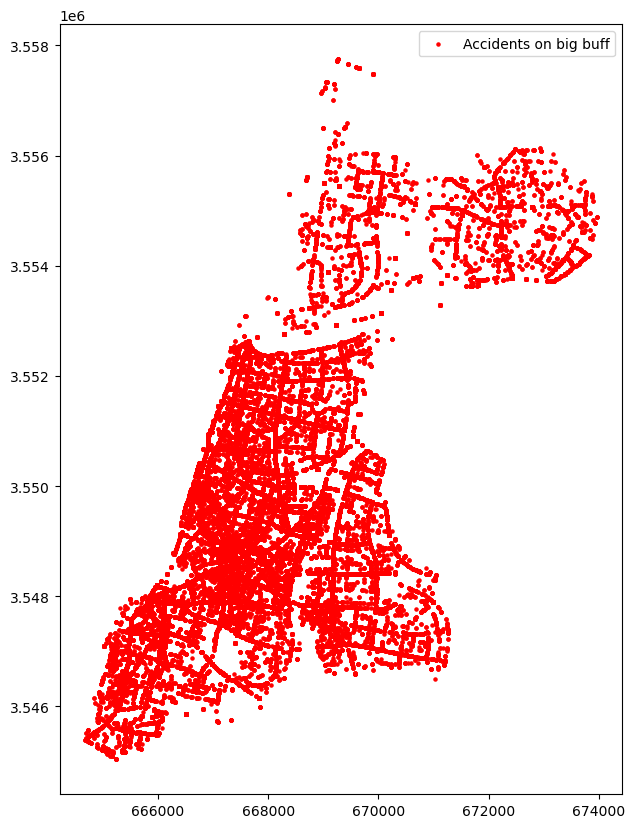

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

## Making sure TA Bicycle Path Aligns with i_m_h_ta_gdf

In [12]:
# Load the BP
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM_20240818_005147/Bicycle Routes.shp")

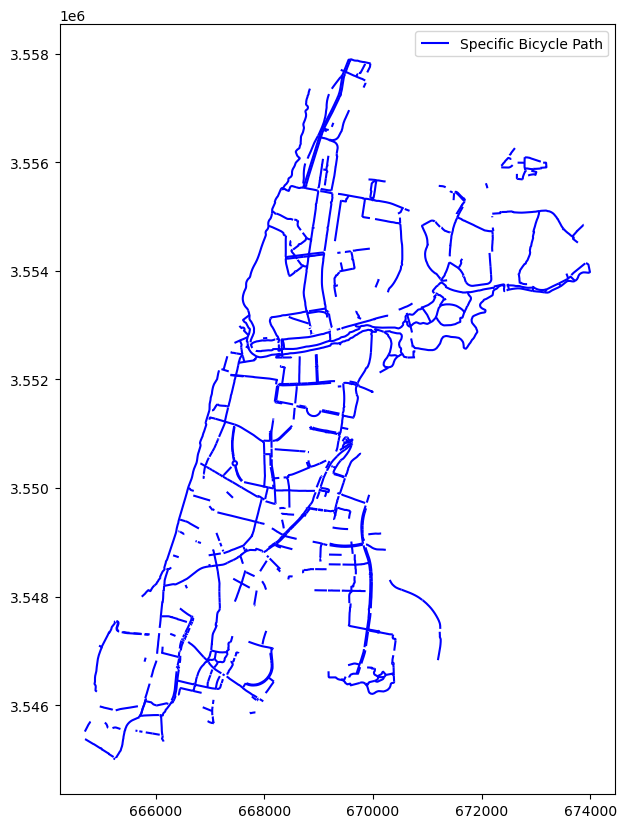

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

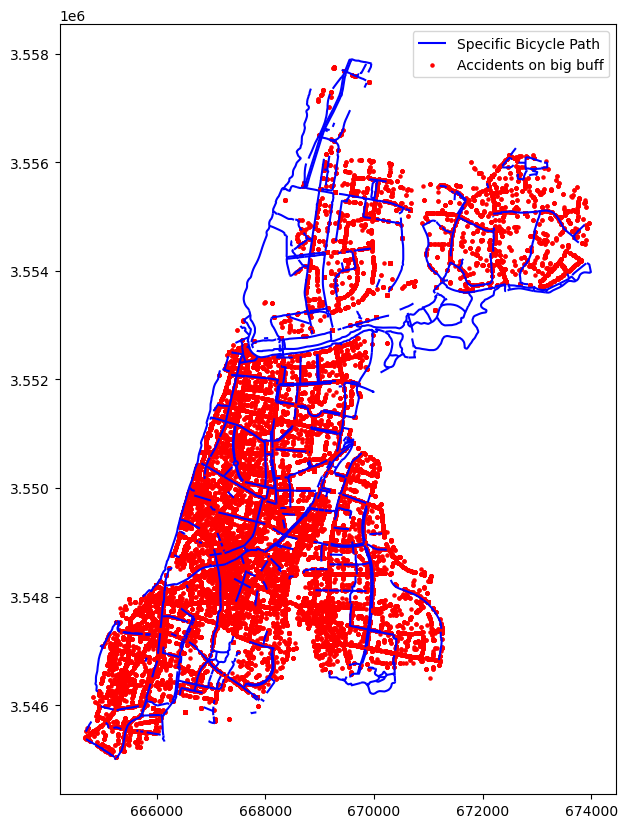

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )


plt.legend()
plt.show()

## Create Micro Mobility Data

In [15]:
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23

micro_m = [SCOOTER, E_BICYCLE, BICYCLE]

In [16]:
i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].head()

accident_id  provider_and_id  provider_code  file_type_police  \
41    2013001368      32013001368              3                 3   
50    2013001742      32013001742              3                 3   
131   2013001350      12013001350              1                 1   
196   2013000147      12013000147              1                 1   
197   2013000147      12013000147              1                 1   

     involved_type involved_type_hebrew  license_acquiring_date  age_group  \
41               2             נהג נפגע                       0          6   
50               2             נהג נפגע                       0          7   
131              2             נהג נפגע                       0          5   
196              2             נהג נפגע                       0          8   
197              2             נהג נפגע                       0          6   

    age_group_hebrew  sex  ... vehicle_attribution  \
41             25-29    1  ...                 1.0   
50             30-34    2  ...                 1.0   
131            20-24    1  ...                 1.0   
196            35-39    1  ...                 1.0   
197            25-29    1  ...                 1.0   

     vehicle_attribution_hebrew seats  total_weight total_weight_hebrew  \
41                       ישראלי  99.0           0.0             לא ידוע   
50                       ישראלי  99.0           0.0             לא ידוע   
131                      ישראלי  99.0           0.0             לא ידוע   
196                      ישראלי  99.0           0.0             לא ידוע   
197                      ישראלי  99.0           0.0             לא ידוע   

     vehicle_damage vehicle_damage_hebrew  urban_intersection  \
41              4.0               אין נזק                 NaN   
50              4.0               אין נזק                 NaN   
131             4.0               אין נזק                 NaN   
196             2.0                בינוני           9110323.0   
197             2.0                בינוני           9110323.0   

           accident_date                        geometry  
41   2013-07-27 01:00:00  POINT (667544.749 3549959.961)  
50   2013-10-07 01:30:00  POINT (667286.918 3548726.540)  
131  2013-08-25 01:00:00  POINT (667023.688 3548785.170)  
196  2013-09-19 00:00:00  POINT (668158.751 3551284.678)  
197  2013-09-19 00:00:00  POINT (668158.751 3551284.678)  

[5 rows x 162 columns]

In [17]:
i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].to_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')

In [18]:
i_m_h_ta_gdf.to_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

## Correcting Bicycle Paths

* Merge with meta data

In [19]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


In [20]:
import geopandas as gpd

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM_20240818_005147/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(-1).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
# bicycle_paths.crs
bicycle_paths
# bicycle_paths['street_name'] = clean_st_names # can't fix names cause there are new BP and not sure where they go, so lets try to handle it as is

# bp = bicycle_paths.to_crs(epsg=4326)
# bicycle_paths

oid_shvil  msorech           dateimport  width direction  create_year  \
0            1    95.10  14/08/2024 02:30:05    2.5   דו סטרי         2012   
1            2   201.14  14/08/2024 02:30:05    2.5   דו סטרי         2013   
2            3   696.31  14/08/2024 02:30:05    2.1   דו סטרי         2004   
3            4   659.20  14/08/2024 02:30:05    2.5   דו סטרי         2018   
4            5   362.67  14/08/2024 02:30:05    2.0   דו סטרי         2018   
..         ...      ...                  ...    ...       ...          ...   
866        462   197.41  14/08/2024 02:30:05    NaN      None         2014   
867        463  2112.94  14/08/2024 02:30:05    NaN      None           -1   
868        464    44.95  14/08/2024 02:30:05    NaN      None           -1   
869        465   112.12  14/08/2024 02:30:05    NaN      None           -1   
870        466    71.58  14/08/2024 02:30:05    NaN      None           -1   

                                     shemmikta miflas create_date  \
0                         נמיר מיוניצ'מן דרומה   None        None   
1                   פרופס מנמיר עד קדושי השואה   None        None   
2     יאיר רוזנבלום מאורי צבי גרינברג עד פרופס   None        None   
3                     קק"ל מנמיר עד חיים לבנון  מדרכה        None   
4    רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר   None        None   
..                                         ...    ...         ...   
866                שביל המוביל למרכז יצחק רבין   None        None   
867                                       None   None        None   
868                                       None   None        None   
869                                       None   None        None   
870                                       None   None        None   

                                              geometry  
0    LINESTRING (669823.985 3557373.860, 669855.549...  
1    LINESTRING (669232.834 3555478.027, 669169.381...  
2    LINESTRING (669232.637 3555478.023, 669249.025...  
3    LINESTRING (669354.261 3555417.055, 669410.178...  
4    LINESTRING (669946.350 3555344.516, 669962.261...  
..                                                 ...  
866  LINESTRING (669777.502 3553114.882, 669733.916...  
867  LINESTRING (670193.904 3552876.389, 670151.903...  
868  LINESTRING (669398.890 3552674.103, 669398.284...  
869  LINESTRING (668324.626 3551551.690, 668319.918...  
870  LINESTRING (668433.941 3550240.154, 668441.188...  

[871 rows x 10 columns]

### Loading Meta Data

In [21]:
# Path to your Excel file
excel_file_path = "./csv_tables/tel_avlv_bycicle_UTM_20240818_005147/export.xlsx"

# Load the Excel file
bicycle_paths_meta_data = pd.read_excel(excel_file_path, engine='openpyxl')

bicycle_paths_meta_data.bitzua = bicycle_paths_meta_data.bitzua.fillna(-1).astype(int)
# Display the first few rows of the dataframe
bicycle_paths_meta_data[~bicycle_paths_meta_data.date_created.isna()]


oid_shvil  ms_orech          date_import  width direction  bitzua  \
4            5    362.67  14/08/2024 02:30:05    2.0   דו סטרי    2018   
15          16   1853.03  14/08/2024 02:30:05    3.5   דו סטרי    2022   
29          30    920.95  14/08/2024 02:30:05    1.6       NaN    2021   
37          38    200.08  14/08/2024 02:30:05    2.0       NaN    2021   
73          74    164.29  14/08/2024 02:30:05    2.4   דו סטרי    2021   
..         ...       ...                  ...    ...       ...     ...   
453        454    364.89  14/08/2024 02:30:05    3.0       NaN    2024   
454        455    120.40  14/08/2024 02:30:05    2.5   דו סטרי    2024   
456        457    258.48  14/08/2024 02:30:05    2.6       NaN    2024   
458        459    146.92  14/08/2024 02:30:05    2.6       NaN    2024   
460        461    325.97  14/08/2024 02:30:05    3.5   דו סטרי    2024   

                                    shem_mikta miflas date_created  
4    רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר    NaN   30/06/2018  
15                       פארק הירקון שביל 7.10  מדרכה   01/01/2022  
29               נמיר מהרב גורן עד דורי שביל 7   כביש   01/09/2021  
37   מרמורק מזרח מאבן גבירול עד הוברמן (מחודש)   כביש   29/04/2021  
73                 קרליבך מ- 454 עד ביליס מנחם   כביש   01/12/2021  
..                                         ...    ...          ...  
453                                 תל גיבורים   כביש   01/03/2024  
454                        הלוחמים מתל גיבורים   כביש   01/03/2024  
456       יובל נאמן מלוי אשכול עד אייזיק שטרן    כביש   01/04/2024  
458      יהודה עמיחי מיובל נאמן עד אייזיק שטרן   כביש   01/04/2024  
460                     פארק גני יהושוע (רוקח)  מדרכה   05/06/2024  

[199 rows x 9 columns]

### Merging bicycle paths with meta data

In [22]:
bicycle_paths_and_meta_data = pd.merge(bicycle_paths, bicycle_paths_meta_data, how='right', on='oid_shvil')
bicycle_paths_and_meta_data.drop(columns=['width_x','direction_x','miflas_x','ms_orech','date_import','shem_mikta'], inplace=True)
bicycle_paths_and_meta_data.columns = ['oid_shvil','msorech','dateimport','create_year','shemmikta','create_date','geometry','width','direction','bitzua','miflas','date_created']
bicycle_paths_and_meta_data.head()

oid_shvil  msorech           dateimport  create_year  \
0          1    95.10  14/08/2024 02:30:05         2012   
1          2   201.14  14/08/2024 02:30:05         2013   
2          3   696.31  14/08/2024 02:30:05         2004   
3          4   659.20  14/08/2024 02:30:05         2018   
4          5   362.67  14/08/2024 02:30:05         2018   

                                   shemmikta create_date  \
0                       נמיר מיוניצ'מן דרומה        None   
1                 פרופס מנמיר עד קדושי השואה        None   
2   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס        None   
3                   קק"ל מנמיר עד חיים לבנון        None   
4  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר        None   

                                            geometry  width direction  bitzua  \
0  LINESTRING (669823.985 3557373.860, 669855.549...    2.5   דו סטרי    2012   
1  LINESTRING (669232.834 3555478.027, 669169.381...    2.5   דו סטרי    2013   
2  LINESTRING (669232.637 3555478.023, 669249.025...    2.1   דו סטרי    2004   
3  LINESTRING (669354.261 3555417.055, 669410.178...    2.5   דו סטרי    2018   
4  LINESTRING (669946.350 3555344.516, 669962.261...    2.0   דו סטרי    2018   

  miflas date_created  
0    NaN          NaN  
1    NaN          NaN  
2    NaN          NaN  
3  מדרכה          NaN  
4    NaN   30/06/2018

In [23]:
bicycle_paths_and_meta_data

oid_shvil  msorech           dateimport  create_year  \
0            1    95.10  14/08/2024 02:30:05         2012   
1            2   201.14  14/08/2024 02:30:05         2013   
2            3   696.31  14/08/2024 02:30:05         2004   
3            4   659.20  14/08/2024 02:30:05         2018   
4            5   362.67  14/08/2024 02:30:05         2018   
..         ...      ...                  ...          ...   
866        462   197.41  14/08/2024 02:30:05         2014   
867        463  2112.94  14/08/2024 02:30:05           -1   
868        464    44.95  14/08/2024 02:30:05           -1   
869        465   112.12  14/08/2024 02:30:05           -1   
870        466    71.58  14/08/2024 02:30:05           -1   

                                     shemmikta create_date  \
0                         נמיר מיוניצ'מן דרומה        None   
1                   פרופס מנמיר עד קדושי השואה        None   
2     יאיר רוזנבלום מאורי צבי גרינברג עד פרופס        None   
3                     קק"ל מנמיר עד חיים לבנון        None   
4    רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר        None   
..                                         ...         ...   
866                שביל המוביל למרכז יצחק רבין        None   
867                                       None        None   
868                                       None        None   
869                                       None        None   
870                                       None        None   

                                              geometry  width direction  \
0    LINESTRING (669823.985 3557373.860, 669855.549...    2.5   דו סטרי   
1    LINESTRING (669232.834 3555478.027, 669169.381...    2.5   דו סטרי   
2    LINESTRING (669232.637 3555478.023, 669249.025...    2.1   דו סטרי   
3    LINESTRING (669354.261 3555417.055, 669410.178...    2.5   דו סטרי   
4    LINESTRING (669946.350 3555344.516, 669962.261...    2.0   דו סטרי   
..                                                 ...    ...       ...   
866  LINESTRING (669777.502 3553114.882, 669733.916...    NaN       NaN   
867  LINESTRING (670193.904 3552876.389, 670151.903...    NaN       NaN   
868  LINESTRING (669398.890 3552674.103, 669398.284...    NaN       NaN   
869  LINESTRING (668324.626 3551551.690, 668319.918...    NaN       NaN   
870  LINESTRING (668433.941 3550240.154, 668441.188...    NaN       NaN   

     bitzua miflas date_created  
0      2012    NaN          NaN  
1      2013    NaN          NaN  
2      2004    NaN          NaN  
3      2018  מדרכה          NaN  
4      2018    NaN   30/06/2018  
..      ...    ...          ...  
866    2014    NaN          NaN  
867      -1    NaN          NaN  
868      -1    NaN          NaN  
869      -1    NaN          NaN  
870      -1    NaN          NaN  

[871 rows x 12 columns]

In [24]:
bicycle_paths_and_meta_data.to_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')

## Checking streets data

In [25]:
ta_streets      = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets_meta = pd.read_excel('./csv_tables/TA_streets_20240724_031704/export.xlsx')

In [26]:
ta_streets.head(5)

oidrechov  krechov      trechov        shemangli  mslamas  tsug  kkivun  \
0        1.0    915.0  הרוגי מלכות  HARUGEY MALKHOT    336.0  רחוב     0.0   
1        2.0      0.0            0           UKNOWN      0.0  רחוב     3.0   
2        3.0    265.0      אמסטרדם        AMSTERDAM    516.0  רחוב     1.0   
3        4.0    644.0    אלון יגאל     YIG'AL ALLON   2524.0  רחוב     0.0   
4        5.0    634.0      מרגולין         MARGOLIN   2649.0  רחוב     1.0   

    UniqueId   shemarvit  kreka  \
0  507-10001   قتل مملكة  100.0   
1  507-10002        None  100.0   
2  507-10003    أمستردام  100.0   
3  507-10004  ألون ييغال  200.0   
4  507-10005    مارغولين  100.0   

                                            geometry  
0  LINESTRING (672865.880 3554095.253, 672895.216...  
1  LINESTRING (666990.498 3551436.940, 667065.337...  
2  LINESTRING (667879.712 3551424.162, 667940.741...  
3  LINESTRING (669570.036 3550420.535, 669581.404...  
4  LINESTRING (669329.153 3548322.758, 669409.403...

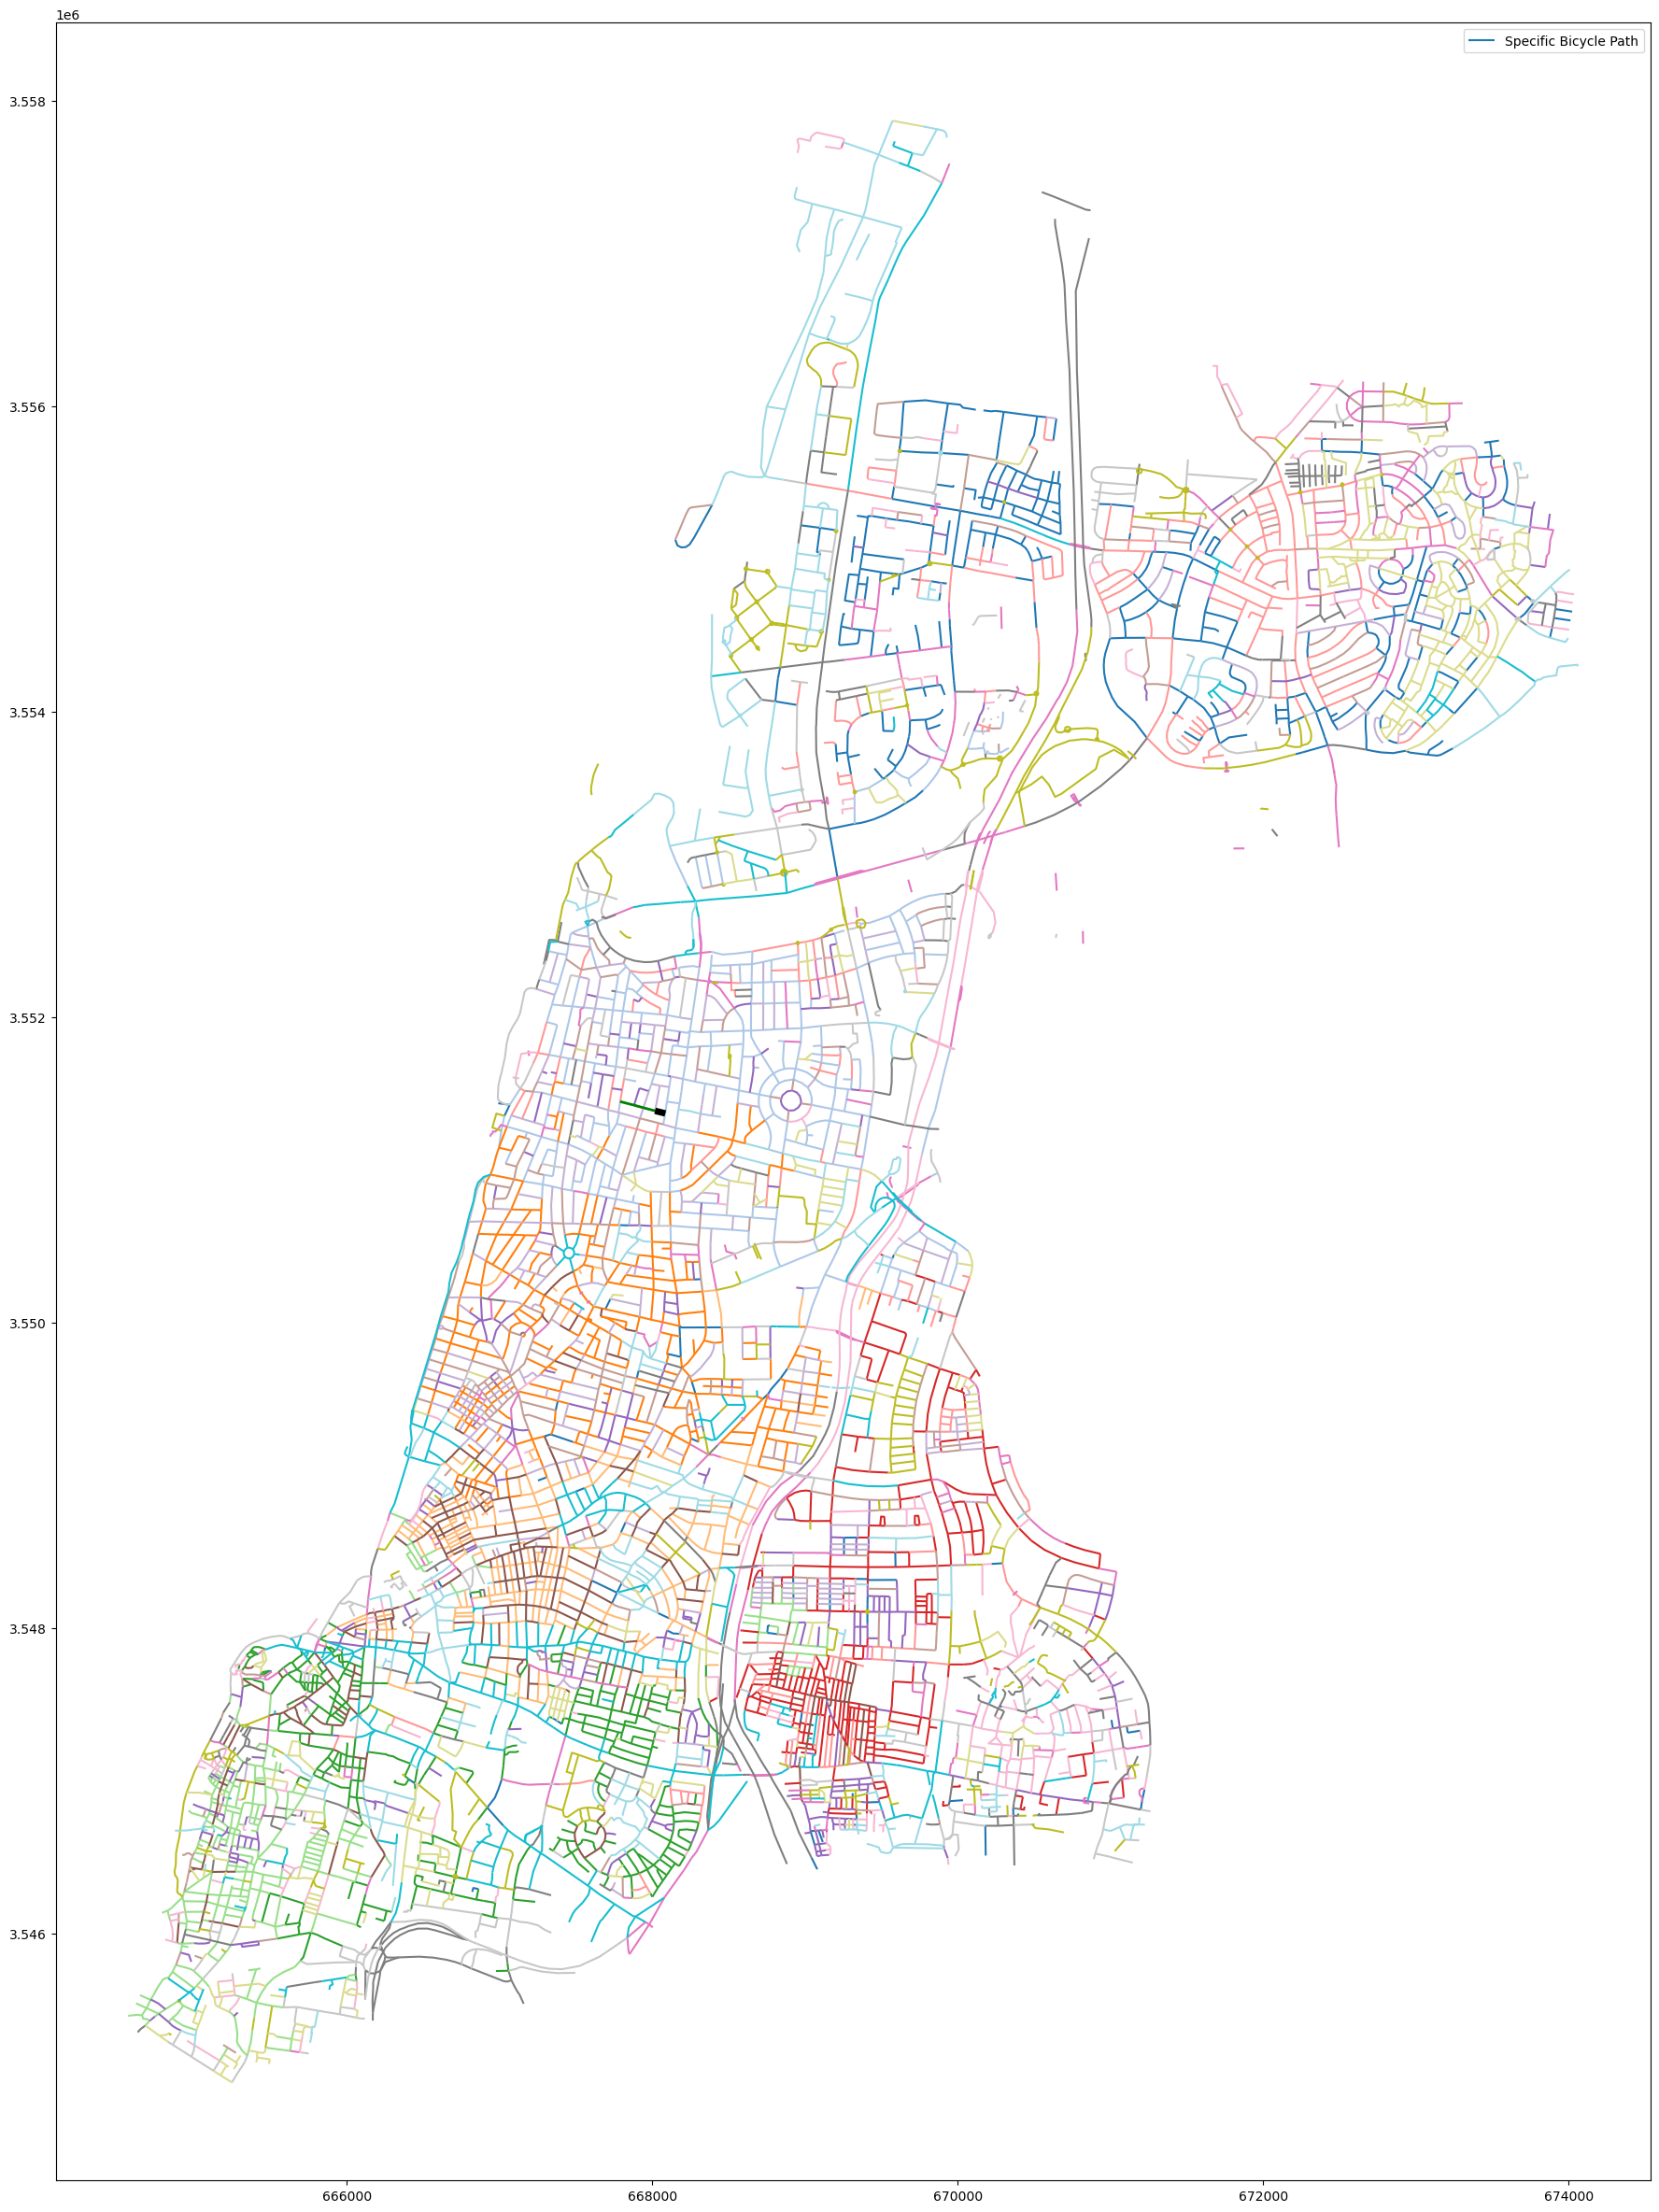

In [27]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_streets[ta_streets.shemangli == "AMSTERDAM"].plot(ax=ax, color='green', linewidth=2)
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].plot(ax=ax, color='black', linewidth=5)
# accidents_bp_distance.plot(ax=ax, color='black', marker='o', label='Accidents on big buff', markersize=20 )
# ta_streets[ta_streets.oidrechov == 4.0].plot()
# accidents_bp_distance['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

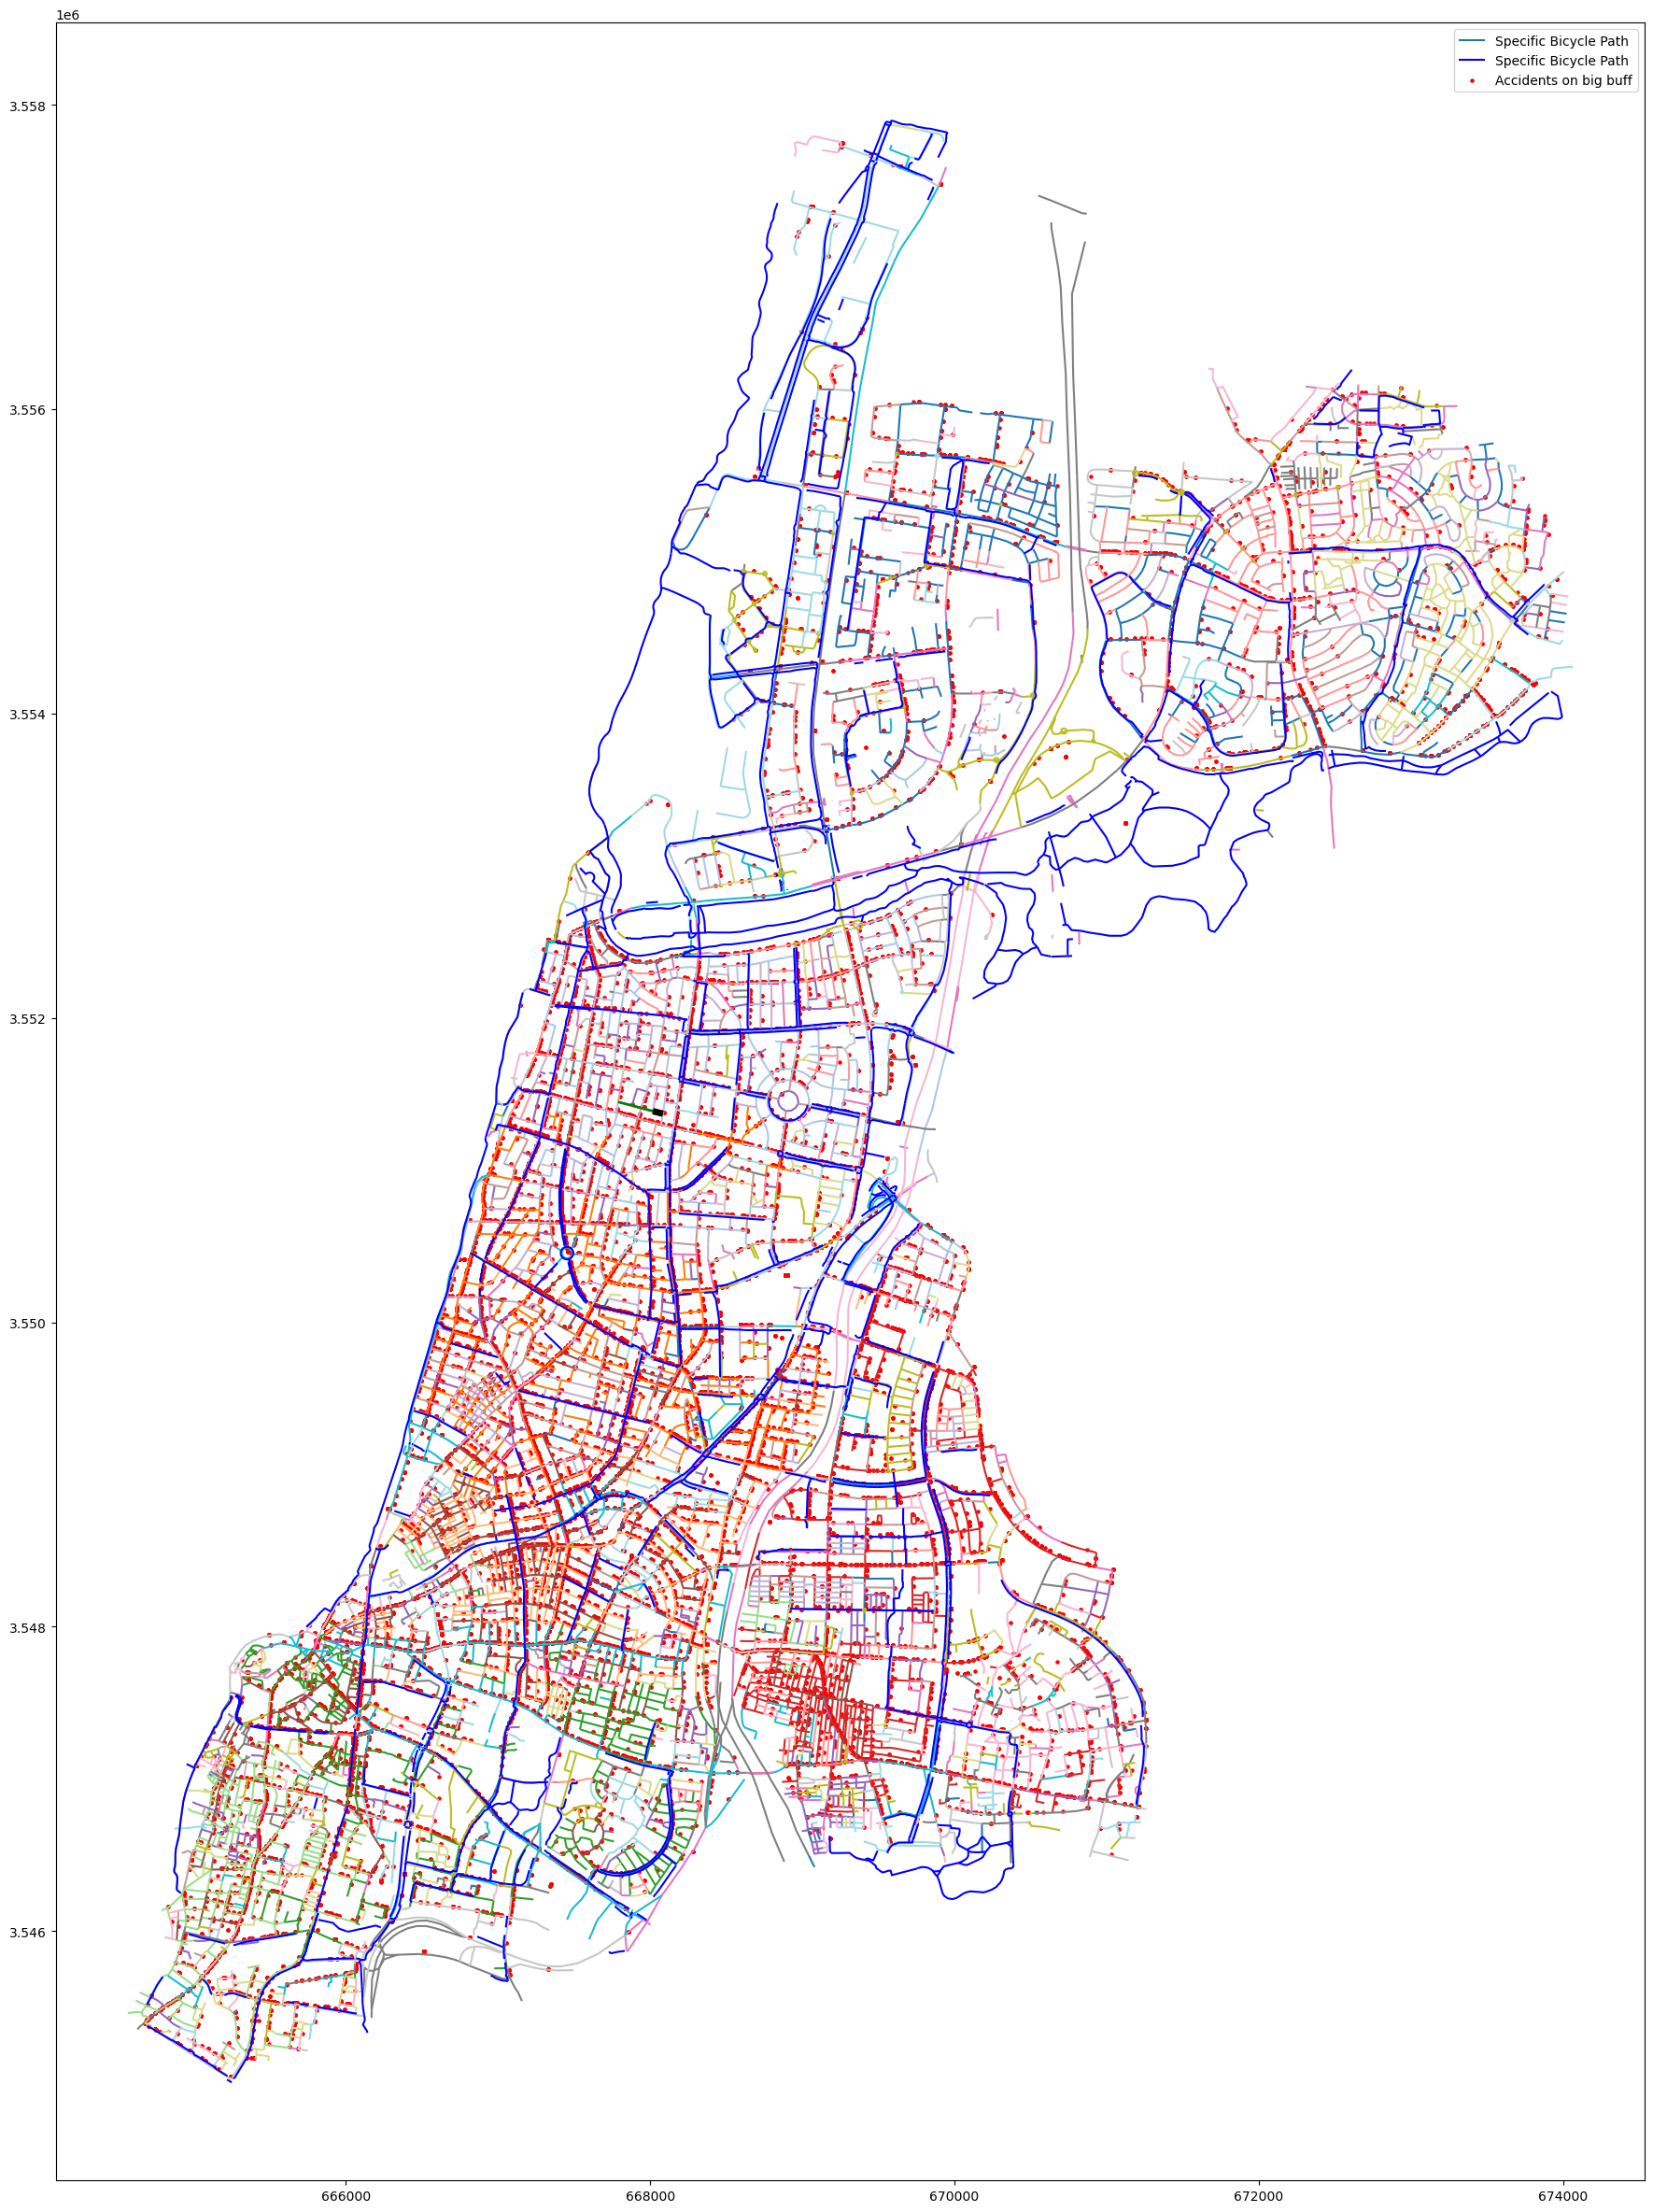

In [28]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_streets[ta_streets.shemangli == "AMSTERDAM"].plot(ax=ax, color='green', linewidth=2)
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].plot(ax=ax, color='black', linewidth=5)
bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )


plt.legend()
plt.show()